In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

C:\Users\acer\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_df = pd.read_csv('twitter_training.csv')
val_df = pd.read_csv('twitter_validation.csv')

In [5]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
val_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
columns=['TweetID','entity','sentiment','Tweet content']
train_df = pd.read_csv('twitter_training.csv', header= None,names=columns)
val_df = pd.read_csv('twitter_validation.csv', header = None ,names = columns)
     

In [8]:
train_df.head()

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
val_df.head()

,TweetID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
train_df.isna().sum()

TweetID            0
entity             0
sentiment          0
Tweet content    686
dtype: int64

In [12]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   Tweet content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [13]:
val_df.isna().sum()

TweetID          0
entity           0
sentiment        0
Tweet content    0
dtype: int64

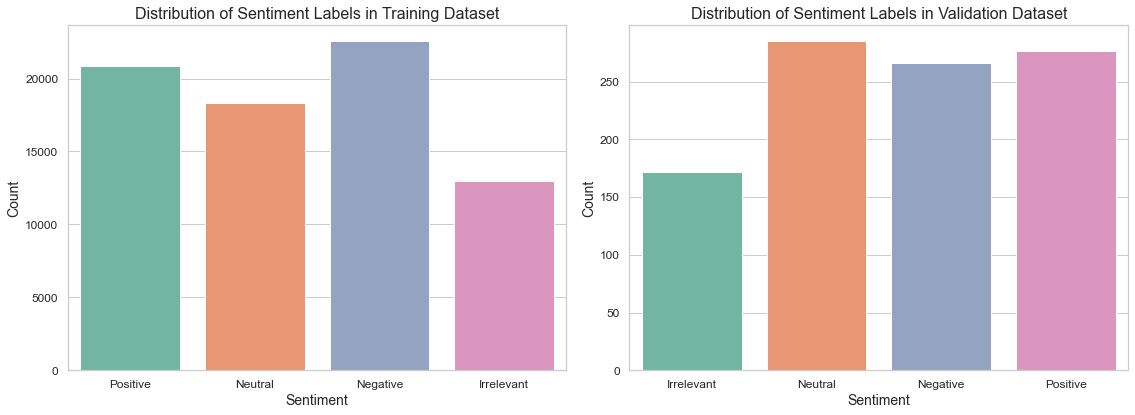

In [19]:
# Create subplots for both visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visualize the distribution of sentiment labels in the training dataset
sns.set(style="whitegrid", font_scale=1.2)
sns.countplot(data=train_df, x='sentiment', palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Sentiment Labels in Training Dataset', fontsize=16)
axes[0].set_xlabel('Sentiment', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Visualize the distribution of sentiment labels in the validation dataset
sns.countplot(data=val_df, x='sentiment', palette='Set2', ax=axes[1])
axes[1].set_title('Distribution of Sentiment Labels in Validation Dataset', fontsize=16)
axes[1].set_xlabel('Sentiment', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

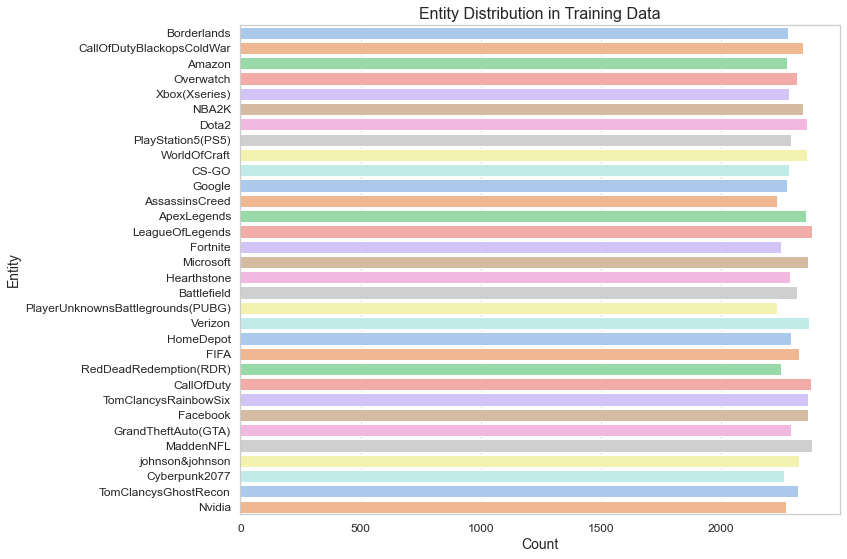

In [30]:
# Setting up the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", font_scale=1.2)

# Plotting entity distribution for training data
sns.countplot(data=train_df, y=train_df.columns[1], palette='pastel')
plt.title('Entity Distribution in Training Data', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Entity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [21]:
print(train_df.columns)

Index(['TweetID', 'entity', 'sentiment', 'Tweet content'], dtype='object')


In [23]:
train_df.dropna(subset=['Tweet content'], inplace=True)
val_df.dropna(subset=['Tweet content'], inplace=True)


In [24]:
# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_df['Tweet content'])
y_train = train_df['sentiment']
X_val = tfidf_vectorizer.transform(val_df['Tweet content'])
y_val = val_df['sentiment']

In [25]:
# Initialize and train a logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
# Predict sentiment labels on the validation dataset
y_pred = log_reg_model.predict(X_val)


In [27]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.816
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.82      0.73      0.77       172
    Negative       0.79      0.88      0.83       266
     Neutral       0.86      0.77      0.81       285
    Positive       0.80      0.86      0.83       277

    accuracy                           0.82      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.82      0.82      1000



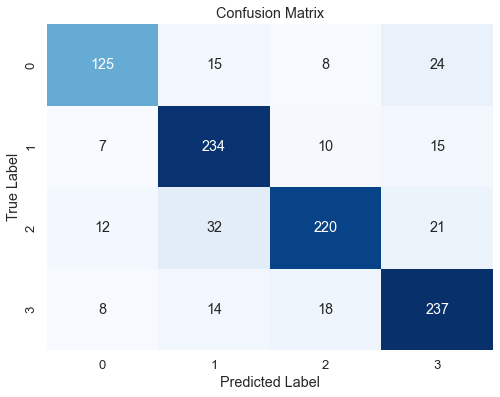

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


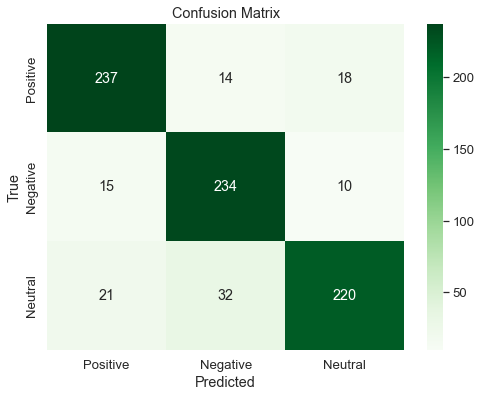

In [63]:

#Generating predictions on the validation data


#Creating a confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred, labels=['Positive', 'Negative', 'Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


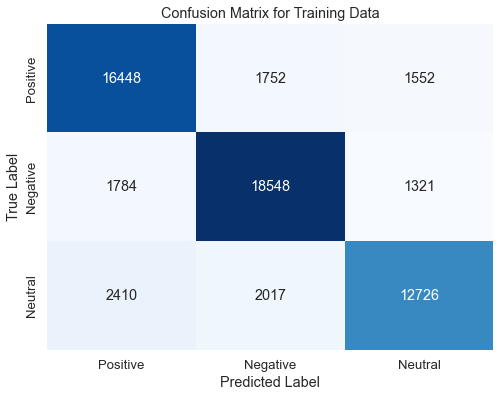

In [71]:

# Predict labels for the training data
y_train_pred = log_reg_model.predict(X_train)

# Compute confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred, labels=['Positive', 'Negative', 'Neutral'])

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()